In [1]:
from pathlib import Path
import sys

from botorch.acquisition.analytic import ExpectedImprovement, ProbabilityOfImprovement
from botorch.acquisition.monte_carlo import qExpectedImprovement
from botorch.sampling.samplers import SobolQMCNormalSampler
from botorch.test_functions import Rastrigin
import matplotlib.pyplot as plt
import numpy as np
import torch

sys.path.insert(0, Path.cwd() / "Source")
from BOGP.optimization.optimizer import Results, run_mc
from BOGP.optimization.plotting import plot_best_observations

ROOT = Path.cwd().parent.parent / "Data" / "Demos" / "1D"
EXPERIMENT = ROOT / "Experiment001"
DIM = 1
N_TRIALS = 100
MAIN_SEED = 2009

N_SAMPLES = 256
N_WARMUP = 3
N_TOTAL = 50
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")


obj_func_kwargs = {"dim": DIM, "negate": True}
obj_func = Rastrigin(**obj_func_kwargs)
search_parameters = [{"name": "x1", "bounds": [-5.12, 5.12]}]


configurations = [
    {
        "config_kwargs": {
            "acq_func": ExpectedImprovement,
            "acq_func_kwargs": {"num_samples": N_SAMPLES},
            "n_warmup": N_WARMUP,
            "n_total": N_TOTAL
        },
        "optim_kwargs": {
            "obj_func": obj_func,
            "search_parameters": search_parameters,
            "fixed_parameters": None,
            "obj_func_kwargs": obj_func_kwargs,
            "device": DEVICE
        },
        "path": EXPERIMENT / "EI",
        "num_trials": N_TRIALS,
        "main_seed": MAIN_SEED
    },
    # {
    #     "config_kwargs": {
    #         "acq_func": ProbabilityOfImprovement,
    #         "acq_func_kwargs": {"num_samples": N_SAMPLES},
    #         "n_warmup": N_WARMUP,
    #         "n_total": N_TOTAL
    #     },
    #     "optim_kwargs": {
    #         "obj_func": obj_func,
    #         "search_parameters": search_parameters,
    #         "fixed_parameters": None,
    #         "obj_func_kwargs": obj_func_kwargs,
    #         "device": DEVICE
    #     },
    #     "path": EXPERIMENT / "PI",
    #     "num_trials": N_TRIALS,
    #     "main_seed": MAIN_SEED
    # },
    # {
    #     "config_kwargs": {
    #         "acq_func": qExpectedImprovement,
    #         "acq_func_kwargs": {"num_samples": N_SAMPLES},
    #         "n_warmup": N_WARMUP,
    #         "n_total": N_TOTAL,
    #         "q": 3,
    #         "sampler": SobolQMCNormalSampler,
    #         "sampler_kwargs": {"num_samples": N_SAMPLES}
    #     },
    #     "optim_kwargs": {
    #         "obj_func": obj_func,
    #         "search_parameters": search_parameters,
    #         "fixed_parameters": None,
    #         "obj_func_kwargs": obj_func_kwargs,
    #         "device": DEVICE
    #     },
    #     "path": EXPERIMENT / "qEI",
    #     "num_trials": N_TRIALS,
    #     "main_seed": MAIN_SEED
    # },
]

ModuleNotFoundError: No module named 'BOGP'

In [5]:
# for configuration in configurations:
#     run_mc(**configuration)

Optimizing: 100%|████████████████████| 47/47 [00:09<00:00,  5.05 eval/s]


In [132]:
evaluations = [
    "EI/Runs/*/results*.pth",
    "PI/Runs/*/results*.pth",
    "qEI/Runs/*/results*.pth"
]
titles = [
    "EI",
    "PI",
    "qEI"
]


for i, evaluation in enumerate(evaluations):
    files = [file for file in EXPERIMENT.glob(evaluation)]
    best_values = []
    for file in files:
        results = Results().load(Path(file))

        best_value = []

        for result in results:
            best_value.append(result.best_value)
        
        best_values.append(best_value)
    
    best_values = np.array(best_values)
    np.save(EXPERIMENT / titles[i] / "best_values.npy", best_values)


<AxesSubplot:xlabel='Observation', ylabel='Best Observed Value'>

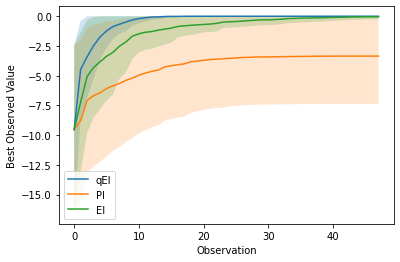

In [133]:
data = np.stack([np.load(path) for path in EXPERIMENT.glob("*/best_values.npy")], axis=0)
labels = [str(path.parent.name) for path in EXPERIMENT.glob("*/best_values.npy")]


plot_best_observations(data, labels=labels, ucb_constraint=0)